# Introducción a `SymPy`

Esta introducción está basada en las [transparencias de SymPy](https://minireference.com/static/tutorials/sympy_tutorial.pdf) de [J. Gross](http://www.jonathangross.de)

Véase también [Taming math and physics using SymPy](https://minireference.com/static/tutorials/sympy_tutorial.pdf), basado en [No bullshit guide to Math and Physics](https://minireference.com)

Una forma fácil de usar `SymPy` en línea es en la página de [SymPy Live](http://live.sympy.org) o bien utilizando los servicios de [sage en la nube](https://cloud.sagemath.com)





Para que los gráficos se incrusten en este bloc necesitamos usar el siguiente comando

In [1]:
%matplotlib inline

Con las siguientes instrucciones importamos todas las variables y métodos de `SymPy`(en algunos casos sólo importaremos los métodos y variables que nos interesen)

También se puede ejecutar en línea con `isympy`

```python
~$ isympy 
IPython console for SymPy 0.7.6.1 (Python 3.5.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org

In [1]: 
```

A partir de `Python 3` la divisón se denota por `/` y la división entera por `//`; de ahí que se use 
```
from __future__ import division
``` 
para evitar confusiones si usamos `Python 2`

In [2]:
from sympy import *

## Enteros, racionales, reales y complejos

División entera

In [3]:
1//7

0

División real

In [4]:
1/7

0.14285714285714285

In [5]:
type(1/7)

float

In [6]:
r=S("1/7")
s=S("2/3")

In [7]:
r+s

17/21

In [8]:
type(_)

sympy.core.numbers.Rational

In [9]:
2**50

1125899906842624

Si queremos trabajar con un racional $a/b$, podemos "sympificar" la expresión "a/b"

In [10]:
a=S("1/7")

In [11]:
a.evalf(20)

0.14285714285714285714

In [12]:
a==Rational(1,7)

True

In [13]:
float(a)

0.14285714285714285

In [14]:
a.n()

0.142857142857143

In [15]:
1+2*I

1 + 2*I

In [16]:
(I)**4

1

In [17]:
pi.n(150)

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940813

### Símbolos

Si intentamos evaluar alguna expresión con `x` o `y` dará un error de nombre no definido; tenemos primero que declararlos como símbolos

Esto lo hacemos con `Symbol` para una variable, o `symbols` para varios

In [18]:
x,y =symbols("x, y")

In [19]:
p = (x+y)**10

In [20]:
p

(x + y)**10

In [21]:
expand(p)

x**10 + 10*x**9*y + 45*x**8*y**2 + 120*x**7*y**3 + 210*x**6*y**4 + 252*x**5*y**5 + 210*x**4*y**6 + 120*x**3*y**7 + 45*x**2*y**8 + 10*x*y**9 + y**10

In [22]:
factor(x**2-y**2)

(x - y)*(x + y)

In [23]:
_.args

(x + y, x - y)

In [24]:
simplify(x** 2+2*x+y-2*x)

x**2 + y

In [25]:
simplify(cos(x)**2+sin(x)**2)

1

In [26]:
collect(x**2+2*x*y+2*x,x)

x**2 + x*(2*y + 2)

In [27]:
(ln(x)+y).subs({x:2,y:1})

log(2) + 1

In [28]:
_.n()

1.69314718055995

In [29]:
a,b,c,d = symbols("a b c d")

In [30]:
together(a/b+c/d)

(a*d + b*c)/(b*d)

In [31]:
apart((a**2+1)/a)

a + 1/a

In [32]:
sin(x)==cos(x-pi/2)

True

In [33]:
expand(sin(2*x))

sin(2*x)

In [34]:
expand_trig(sin(2*x))

2*sin(x)*cos(x)

In [35]:
trigsimp(_)

sin(2*x)

## Resolución de ecuaciones

In [36]:
solve(x**2+2*x-1)

[-1 + sqrt(2), -sqrt(2) - 1]

In [37]:
l=solve(a*x**2+b*x+c,x)

In [38]:
solve(a*x**2+b*x+c,x)

[(-b - sqrt(-4*a*c + b**2))/(2*a), (-b + sqrt(-4*a*c + b**2))/(2*a)]

In [39]:
l[1].subs({a:1,b:2,c:-1})

-1 + sqrt(2)

In [40]:
solve([x**2+y**2-1, y-x**2],[x,y])

[(-sqrt(-1/2 + sqrt(5)/2), -1/2 + sqrt(5)/2),
 (sqrt(-1/2 + sqrt(5)/2), -1/2 + sqrt(5)/2),
 (-sqrt(-sqrt(5)/2 - 1/2), -sqrt(5)/2 - 1/2),
 (sqrt(-sqrt(5)/2 - 1/2), -sqrt(5)/2 - 1/2)]

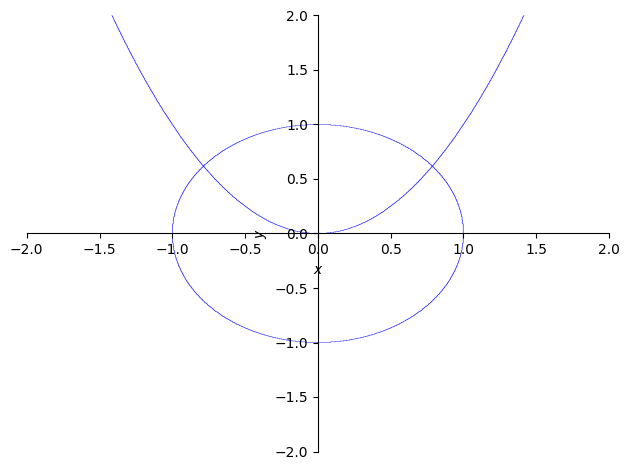

In [41]:
plot_implicit(Eq(x**2+y**2-1,0) | Eq(x**2-y,0),(x,-2,2),(y,-2,2))

## Límites

El infinito se denota por `oo` (dos oes en minúscula seguidos)

In [42]:
oo+1

oo

In [43]:
n=Symbol("n", integer=true)

In [44]:
limit((1+1/n)**n, n, oo)

E

In [45]:
limit(1/x,x,0,dir="-")

-oo

In [46]:
limit(1/x,x,0,dir="+")

oo

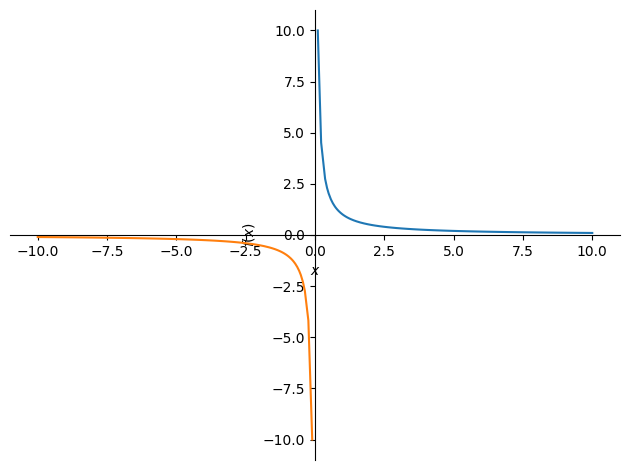

In [47]:
plot((1/x,(x,.1,10)),(1/x,(x,-10,-.1)))

In [48]:
a_n=1/n

In [49]:
limit(1+a_n,n,oo)

1

In [50]:
[a_n.subs({n:i}) for i in range(1,10)]

[1, 1/2, 1/3, 1/4, 1/5, 1/6, 1/7, 1/8, 1/9]

## Derivadas

In [51]:
diff((x**3*sin(x**2))/cos(x))

2*x**4*cos(x**2)/cos(x) + x**3*sin(x)*sin(x**2)/cos(x)**2 + 3*x**2*sin(x**2)/cos(x)

In [52]:
diff((x**3*sin(x**2))/cos(x),y)

0

In [53]:
f=symbols("f", cls=Function)

In [54]:
dsolve(f(x)-diff(f(x),x),f(x))

Eq(f(x), C1*exp(x))

## Integrales

In [55]:
integrate(cos(x))

sin(x)

In [56]:
integrate(cos(x),(x,-1,1))

2*sin(1)

## Series

In [57]:
a_n = 1/n

In [58]:
summation(a_n,(n,1,oo))

oo

In [59]:
b_n=1/factorial(n)

In [60]:
summation(b_n,(n,0,oo))

E

In [61]:
exp = x**n/factorial(n)

In [62]:
summation(exp.subs({x:1}),(n,0,10))

9864101/3628800

In [63]:
_.n()

2.71828180114638

In [64]:
summation(exp.subs({x:5}),(n,0,oo))

exp(5)

Series de Taylor (en 0, MacLaurin)

In [65]:
series(sin(x),x,0,8)

x - x**3/6 + x**5/120 - x**7/5040 + O(x**8)

O bien en el 1

In [66]:
series(sin(x+1),x,0,8)

sin(1) + x*cos(1) - x**2*sin(1)/2 - x**3*cos(1)/6 + x**4*sin(1)/24 + x**5*cos(1)/120 - x**6*sin(1)/720 - x**7*cos(1)/5040 + O(x**8)

## Matrices (y vectores)

Las matrices se introducen for filas como una lista de listas con el comando `Matrix`
Los vectores se consideran matrices con una sola fila

In [67]:
a=Matrix([[1,1,2],[1,-1,0]])

In [68]:
a

Matrix([
[1,  1, 2],
[1, -1, 0]])

In [69]:
a=a[0:2,0:2]

In [70]:
a.det()

-2

In [71]:
a.transpose()

Matrix([
[1,  1],
[1, -1]])

In [72]:
pretty_print(a)

⎡1  1 ⎤
⎢     ⎥
⎣1  -1⎦


In [73]:
latex(a)

'\\left[\\begin{matrix}1 & 1\\\\1 & -1\\end{matrix}\\right]'

In [74]:
a[0,1]

1

In [75]:
a[0,0]

1

In [76]:
a.inv()

Matrix([
[1/2,  1/2],
[1/2, -1/2]])

In [77]:
a.inv()*a

Matrix([
[1, 0],
[0, 1]])

In [78]:
a.row(1)

Matrix([[1, -1]])

In [79]:
a.rref()

(Matrix([
 [1, 0],
 [0, 1]]),
 (0, 1))

Valores propios, vectores propios y diagonalización

In [80]:
a.eigenvals()

{-sqrt(2): 1, sqrt(2): 1}

In [81]:
a.eigenvects()

[(-sqrt(2),
  1,
  [Matrix([
   [1 - sqrt(2)],
   [          1]])]),
 (sqrt(2),
  1,
  [Matrix([
   [1 + sqrt(2)],
   [          1]])])]

In [82]:
(a-sqrt(2)*eye(2)).nullspace()

[Matrix([
 [-1/(1 - sqrt(2))],
 [               1]])]

In [83]:
Q,D=a.diagonalize()

In [84]:
D

Matrix([
[-sqrt(2),       0],
[       0, sqrt(2)]])

In [85]:
Q

Matrix([
[1 - sqrt(2), 1 + sqrt(2)],
[          1,           1]])

In [86]:
(Q*D*Q.inv())

Matrix([
[-sqrt(2)*(-1 + sqrt(2))*(1 - sqrt(2))/(-4 + 2*sqrt(2)) + 1/2 + sqrt(2)/2, -sqrt(2)*(1 - sqrt(2))/(4 - 2*sqrt(2)) + sqrt(2)*(1/2 - sqrt(2)/4)*(1 + sqrt(2))],
[                          -sqrt(2)*(-1 + sqrt(2))/(-4 + 2*sqrt(2)) + 1/2,                             -sqrt(2)/(4 - 2*sqrt(2)) + sqrt(2)*(1/2 - sqrt(2)/4)]])

In [87]:
simplify(_)

Matrix([
[1,  1],
[1, -1]])

In [88]:
b=Matrix([[1,3],[0,1]])

In [89]:
try:
    b.diagonalize()
except:
    print("no es diagonalizable")

no es diagonalizable


In [90]:
b.eigenvects()

[(1,
  2,
  [Matrix([
   [1],
   [0]])])]

In [91]:
b.jordan_form()

(Matrix([
 [3, 0],
 [0, 1]]),
 Matrix([
 [1, 1],
 [0, 1]]))

La matriz indentidad tiene un función propia

In [92]:
eye(3)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

Vamos a discutir el siguiente sistema en función del parámetro $a$. 

$$ \begin{array}{c} x+y+z=a,\\  2x+ay+z=-2,\\  -2x-2y+az=4.  \end{array} $$

In [3]:
x,y,z,a=symbols("x y z a")
C=Matrix([[1,1,1],[2,a,1],[-2,-2,a]])
b=Matrix([a,-2,4])

In [4]:
sol=solve(C.det())

In [5]:
sol

[-2, 2]

In [6]:
Ca=C.col_insert(3,b)
Ca

Matrix([
[ 1,  1, 1,  a],
[ 2,  a, 1, -2],
[-2, -2, a,  4]])

In [97]:
C.subs({a:2}).rank()

2

In [98]:
Ca.subs({a:2}).rank()

3

In [99]:
linsolve((C.subs({a:2}),b.subs({a:2})),[x,y,z])

EmptySet

In [100]:
C.subs({a:-2}).rank()

2

In [101]:
Ca.subs({a:-2}).rank()

2

In [102]:
linsolve((C.subs({a:-2}),b.subs({a:-2})),[x,y,z])

{(-3*z/4 - 3/2, -z/4 - 1/2, z)}

In [103]:
linsolve((C,b),[x,y,z])

{((a**2 - 2*a + 4)/(a - 2), -2*a/(a - 2), 2)}